The next several cells of Python code, from importing all packages I need to running the two LASSO regressions at alpha = .1 and alpha = .01, are all Question #1, part a and part b.

In [1]:
#import relevant packages and data
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from yellowbrick.regressor.alphas import alphas

data = pd.read_csv(r'C:\Users\Home\Documents\Data Mining\Assignments\Assignment 3\HW3_Airfares_Selected.csv')

#generate lists of categorical and numerical variables
cvar_list = ['VACATION', 'SW', 'SLOT','GATE']
nvar_list = ['S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','FARE']

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#standardizing numerical values for use in model
standardized_data = data.copy()

original_column_values = data[nvar_list]
sample_mean = data[nvar_list].mean()
sample_stddev = data[nvar_list].std()

standardized_data[nvar_list] = ((original_column_values - sample_mean)/sample_stddev)

In [3]:
data.head(10)

,VACATION,SW,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,FARE
0,No,Yes,28637,21112,3036732,205711,Free,Free,312,64.11
1,No,No,26993,29838,3532657,7145897,Free,Free,576,174.47
2,No,No,30124,29838,5787293,7145897,Free,Free,364,207.76
3,No,Yes,29260,29838,7830332,7145897,Controlled,Free,612,85.47
4,No,Yes,29260,29838,7830332,7145897,Free,Free,612,85.47
5,No,Yes,26046,29838,2230955,7145897,Free,Free,309,56.76
6,No,No,28637,29838,3036732,7145897,Free,Free,1220,228.00
7,Yes,Yes,26752,29838,1440377,7145897,Free,Free,921,116.54
8,No,Yes,27211,29838,3770125,7145897,Free,Free,1249,172.63
9,No,Yes,25450,29838,1694803,7145897,Free,Free,964,114.76


In [4]:
standardized_data.head(10)

,VACATION,SW,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,FARE
0,No,Yes,0.242677,-1.422984,-0.507259,-1.092213,Free,Free,-1.024949,-1.271156
1,No,No,-0.214056,0.468595,-0.342618,1.441319,Free,Free,-0.616284,0.178752
2,No,No,0.655793,0.468595,0.405893,1.441319,Free,Free,-0.944455,0.616116
3,No,Yes,0.415758,0.468595,1.084157,1.441319,Controlled,Free,-0.560557,-0.990529
4,No,Yes,0.415758,0.468595,1.084157,1.441319,Free,Free,-0.560557,-0.990529
5,No,Yes,-0.477149,0.468595,-0.774767,1.441319,Free,Free,-1.029593,-1.367721
6,No,No,0.242677,0.468595,-0.507259,1.441319,Free,Free,0.380612,0.882029
7,Yes,Yes,-0.281010,0.468595,-1.037229,1.441319,Free,Free,-0.082233,-0.582332
8,No,Yes,-0.153491,0.468595,-0.263782,1.441319,Free,Free,0.425503,0.154578
9,No,Yes,-0.642729,0.468595,-0.952763,1.441319,Free,Free,-0.015670,-0.605717


In [3]:
#Creating Dummies for Categorical Variables
    #Create the dummies
standardized_data[cvar_list] = standardized_data[cvar_list].astype('category')
standardized_data[nvar_list] = standardized_data[nvar_list].astype('float64')

standardized_data = pd.get_dummies(standardized_data, prefix_sep = '_')

#remove one "redundant dummy" per each set of dummies
rdummies = ['VACATION_No','SW_No','SLOT_Free','GATE_Constrained']
standardized_data = standardized_data.drop(columns=rdummies)

In [4]:
#Partition data into test and training sets
data_for_partitioning = standardized_data.copy()
testpart_size = .2
non_test_data, test_data = train_test_split(data_for_partitioning, test_size = testpart_size, random_state = 1)

In [5]:
#Building two LASSO regression models
dependent_variable = 'FARE'
y = non_test_data[dependent_variable]
x = non_test_data.drop(columns = [dependent_variable])

#Establish Alpha Penalty levels and establish the classifier that gets fed into our regression
alpha_1 = .01
alpha_2 = .1
classifier_1 = Lasso(alpha = alpha_1, random_state = 1).fit(x,y)
classifier_2 = Lasso(alpha = alpha_2, random_state = 1).fit(x,y)

#With the a classifier as input, create the capability to display LASSO regressions
def summary_coefficients(model_object):
    n_predictors = x.shape[1]
    model_coefficients = pd.DataFrame(model_object.coef_.reshape(1,n_predictors),columns = x.columns.values)
    model_coefficients['Intercept'] = model_object.intercept_
    return (model_coefficients.transpose())

#run and display the first LASSO regression
print ("---First LASSO, alpha = ",alpha_1,"---")
print(summary_coefficients(classifier_1))
print("       ")
#run and display the second LASSO regression
print ("---Second LASSO, alpha = ",alpha_2,"---")
print(summary_coefficients(classifier_2))

---First LASSO, alpha =  0.01 ---
                        0
S_INCOME         0.022521
E_INCOME         0.062799
S_POP            0.033497
E_POP            0.054358
DISTANCE         0.600097
VACATION_Yes    -0.592885
SW_Yes          -0.632651
SLOT_Controlled  0.106474
GATE_Free       -0.279766
Intercept        0.539930
       
---Second LASSO, alpha =  0.1 ---
                        0
S_INCOME         0.053697
E_INCOME         0.051722
S_POP            0.017274
E_POP            0.081628
DISTANCE         0.514107
VACATION_Yes    -0.142356
SW_Yes          -0.334210
SLOT_Controlled  0.000000
GATE_Free       -0.000000
Intercept        0.137609


Question #1: part c

                        0
S_INCOME         0.018115
E_INCOME         0.062204
S_POP            0.029465
E_POP            0.046816
DISTANCE         0.608277
VACATION_Yes    -0.624462
SW_Yes          -0.645253
SLOT_Controlled  0.144712
GATE_Free       -0.323197
Intercept        0.575710


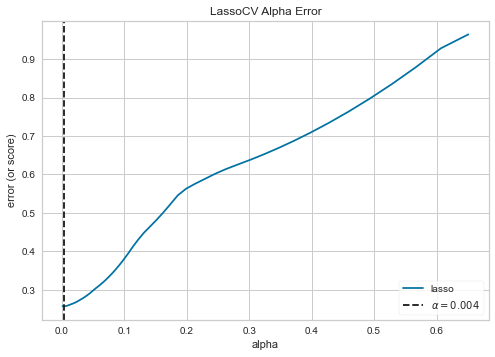

C:\Users\Home\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021060139520>,
               model=None)

In [6]:
#Using the K-folds method to find the optimal alpha
kfolds = 5
classifier_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs = -1).fit(x,y)
print(summary_coefficients(classifier_optimal))

#Using some advice I found at https://www.scikit-yb.org/en/latest/api/regressor/alphas.html, I uncovered Python's optimal alpha.
# Note, as a check, I re-ran the above LASSO with "classifier_1" and changed "alpha_1" to the value suggested in the below graph.
#  Sure enough, the cofficients turned out to be very very close.
alphas(LassoCV(random_state=0), x, y)

Question #1: part d

In [7]:
#Create a correlation matrix to find correlations with the dependent variable, FARE.
correlation_matrix = data.corr()
print(correlation_matrix)


          S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE
S_INCOME  1.000000 -0.140002  0.516779 -0.272888  0.030438  0.208563
E_INCOME -0.140002  1.000000 -0.146626  0.458060  0.179154  0.326739
S_POP     0.516779 -0.146626  1.000000 -0.281467  0.021207  0.145000
E_POP    -0.272888  0.458060 -0.281467  1.000000  0.116757  0.285264
DISTANCE  0.030438  0.179154  0.021207  0.116757  1.000000  0.672640
FARE      0.208563  0.326739  0.145000  0.285264  0.672640  1.000000


Question #1: part e

                        0
S_INCOME         0.019475
E_INCOME         0.062388
S_POP            0.030709
E_POP            0.049143
DISTANCE         0.605753
VACATION_Yes    -0.614716
SW_Yes          -0.641363
SLOT_Controlled  0.132911
GATE_Free       -0.309793
Intercept        0.564667


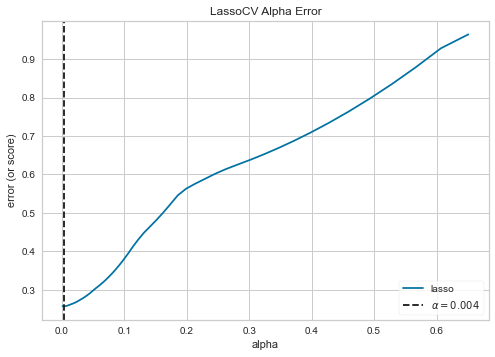

C:\Users\Home\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021060D10AF0>,
               model=None)

In [8]:
#Re-run K-Folds LASSO regressions with folds = 3
kfolds_2 = 3
classifier_optimal_2 = LassoCV(cv=kfolds_2, random_state=1, n_jobs = -1).fit(x,y)
print(summary_coefficients(classifier_optimal_2))

#Using some advice I found at https://www.scikit-yb.org/en/latest/api/regressor/alphas.html, I uncovered Python's optimal alpha.
# Note, as a check, I re-ran the above LASSO with "classifier_1" and changed "alpha_1" to the value suggested in the below graph.
#  Sure enough, the cofficients turned out to be very very close.
alphas(LassoCV(random_state=0), x, y)


Question #1: part g

In [9]:
#Among all three models, which one has the lowest ASE over the test partition?

#K-Folds = 3 Cross-Validation Model
y_test_actual_CV = test_data[dependent_variable]
x_test_CV = test_data.drop(columns = [dependent_variable])
y_test_predicted_CV = classifier_optimal_2.predict(x_test_CV)
n_obs_test_CV = test_data.shape[0]

ASE_test_CV = sum((y_test_actual_CV - y_test_predicted_CV)**2)/n_obs_test_CV
print ("The ASE over the",kfolds_2,"fold test partition is",ASE_test_CV)

#Model with alpha = .01
y_test_actual_lower_alpha = test_data[dependent_variable]
x_test_lower_alpha = test_data.drop(columns = [dependent_variable])
y_test_predicted_lower_alpha = classifier_1.predict(x_test_lower_alpha)
n_obs_test_lower_alpha = test_data.shape[0]

ASE_test_lower_alpha = sum((y_test_actual_lower_alpha - y_test_predicted_lower_alpha)**2)/n_obs_test_lower_alpha
print ("The ASE over the test partition for the model with alpha =", alpha_1, "is",ASE_test_lower_alpha)

#Model with alpha = .1
y_test_actual_higher_alpha = test_data[dependent_variable]
x_test_higher_alpha = test_data.drop(columns = [dependent_variable])
y_test_predicted_higher_alpha = classifier_2.predict(x_test_higher_alpha)
n_obs_test_higher_alpha = test_data.shape[0]

ASE_test_higher_alpha = sum((y_test_actual_higher_alpha - y_test_predicted_higher_alpha)**2)/n_obs_test_higher_alpha
print ("The ASE over the test partition for the model with alpha =", alpha_2, "is",ASE_test_higher_alpha)

The ASE over the 3 fold test partition is 0.3266243850921795
The ASE over the test partition for the model with alpha = 0.01 is 0.32721956500281546
The ASE over the test partition for the model with alpha = 0.1 is 0.4311941761059571


Question #1: part h

Please note: this question explicitly states "show your calculation”. As such, I am opting to calculate and plug into the model in (e) somewhat manually rather than getting Python to do it for me using techniques like loops and the user-defined function, as shown in the lecture videos.

In [12]:
#Coefficients from model in part (e)
S_INCOME    =     0.019475
E_INCOME    =     0.062388
S_POP       =     0.030709
E_POP       =     0.049143
DISTANCE    =     0.605753
VACATION_Yes  =  -0.614716
SW_Yes       =   -0.641363
SLOT_Controlled = 0.132911
GATE_Free    =   -0.309793
Intercept    =    0.564667

#Values Given For New Route
S_INCOME_new = 28760
E_INCOME_new = 27664
S_POP_new = 4557004
E_POP_new = 3195503
DISTANCE_new = 1976
VACATION_new = 0  ###Vacation  = No
SW_new = 0        ###SW = No
SLOT_new = 0      ###SLOT = Free
GATE_new = 1      ###GATE = Free

#Historical data means
S_INCOME_historical_mean = data['S_INCOME'].mean()
E_INCOME_historical_mean = data['E_INCOME'].mean()
S_POP_historical_mean = data['S_POP'].mean()
E_POP_historical_mean = data['E_POP'].mean()
DISTANCE_historical_mean = data['DISTANCE'].mean()

FARE_historical_mean = data['FARE'].mean()

#Historical data standard deviations
S_INCOME_historical_stddev = data['S_INCOME'].std()
E_INCOME_historical_stddev = data['E_INCOME'].std()
S_POP_historical_stddev = data['S_POP'].std()
E_POP_historical_stddev = data['E_POP'].std()
DISTANCE_historical_stddev = data['DISTANCE'].std()

FARE_historical_stddev = data['FARE'].std()

#New Data Standardized Numerical Values
S_INCOME_new_standardized = (S_INCOME_new - S_INCOME_historical_mean)/S_INCOME_historical_stddev
E_INCOME_new_standardized = (E_INCOME_new - E_INCOME_historical_mean)/E_INCOME_historical_stddev
S_POP_new_standardized = (S_POP_new - S_POP_historical_mean)/S_POP_historical_stddev
E_POP_new_standardized = (E_POP_new - E_POP_historical_mean)/E_POP_historical_stddev
DISTANCE_new_standardized = (DISTANCE_new - DISTANCE_historical_mean)/DISTANCE_historical_stddev

#Predicted New Route Price (Standardized)
predicted_new_route_FARE_standardized_numerical_component = Intercept + (S_INCOME * S_INCOME_new_standardized) + (E_INCOME * E_INCOME_new_standardized) + (S_POP * S_POP_new_standardized) + (E_POP * E_POP_new_standardized) + (DISTANCE * DISTANCE_new_standardized)
predicted_new_route_FARE_categorical_component = (VACATION_Yes * VACATION_new) + (SW_Yes * SW_new) + (SLOT_Controlled * SLOT_new) + (GATE_Free * GATE_new)

predicted_new_route_FARE_standardized = predicted_new_route_FARE_standardized_numerical_component + predicted_new_route_FARE_categorical_component
print("The standardized value of the price on the new route is",predicted_new_route_FARE_standardized)

#Convert Standardized Price Back to Dollars
predicted_new_route_FARE_unstandardized = (predicted_new_route_FARE_standardized * FARE_historical_stddev) + FARE_historical_mean
print("The unstandardized price on the new route is",predicted_new_route_FARE_unstandardized)

The standardized value of the price on the new route is 1.199433152826707
The unstandardized price on the new route is 252.15926444225383


Question #1: part i

In [13]:
#Change the Southwest dummy from "off" to "on" and plug into the above formulas
SW_new = 1

#Predicted New Route Price (Standardized)
predicted_new_route_FARE_standardized_numerical_component = Intercept + (S_INCOME * S_INCOME_new_standardized) + (E_INCOME * E_INCOME_new_standardized) + (S_POP * S_POP_new_standardized) + (E_POP * E_POP_new_standardized) + (DISTANCE * DISTANCE_new_standardized)
predicted_new_route_FARE_categorical_component = (VACATION_Yes * VACATION_new) + (SW_Yes * SW_new) + (SLOT_Controlled * SLOT_new) + (GATE_Free * GATE_new)

predicted_new_route_FARE_standardized = predicted_new_route_FARE_standardized_numerical_component + predicted_new_route_FARE_categorical_component
print("The standardized value of the price on the new route, now also serviced by SouthWest is",predicted_new_route_FARE_standardized)

#Convert Standardized Price Back to Dollars
predicted_new_route_FARE_unstandardized = (predicted_new_route_FARE_standardized * FARE_historical_stddev) + FARE_historical_mean
print("The standardized value of the price on the new route, now also serviced by SouthWest is",predicted_new_route_FARE_unstandardized)


The standardized value of the price on the new route, now also serviced by SouthWest is 0.558070152826707
The standardized value of the price on the new route, now also serviced by SouthWest is 203.34183161156074


Question #1: part j

The next several cells in the notebook are all for part j, in order to better segment the results

In [15]:
data = pd.read_csv(r'C:\Users\Home\Documents\Data Mining\Assignments\Assignment 3\HW3_Airfares_Selected.csv')

#generate lists of categorical and numerical variables
cvar_list = ['VACATION', 'SW', 'SLOT','GATE']
nvar_list = ['S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','FARE']

#standardizing numerical values for use in model
standardized_data = data.copy()

original_column_values = data[nvar_list]
sample_mean = data[nvar_list].mean()
sample_stddev = data[nvar_list].std()

standardized_data[nvar_list] = ((original_column_values - sample_mean)/sample_stddev)

#Creating Dummies for Categorical Variables
    #Create the dummies
standardized_data[cvar_list] = standardized_data[cvar_list].astype('category')
standardized_data[nvar_list] = standardized_data[nvar_list].astype('float64')

standardized_data = pd.get_dummies(standardized_data, prefix_sep = '_')

#designate "SLOT_Controlled" instead of "SLOT_Free" as one of the dummies to drop
rdummies_2 = ['VACATION_No','SW_No','SLOT_Controlled','GATE_Constrained']
standardized_data_2 = standardized_data.drop(columns=rdummies_2)

data_for_partitioning = standardized_data_2.copy()
testpart_size = .2
non_test_data, test_data = train_test_split(data_for_partitioning, test_size = testpart_size, random_state = 1)

In [19]:
#Building two LASSO regression models
dependent_variable = 'FARE'
y = non_test_data[dependent_variable]
x = non_test_data.drop(columns = [dependent_variable])

#Establish Alpha Penalty levels and establish the classifier that gets fed into our regression
alpha_1 = .01
alpha_2 = .1
classifier_1 = Lasso(alpha = alpha_1, random_state = 1).fit(x,y)
classifier_2 = Lasso(alpha = alpha_2, random_state = 1).fit(x,y)

#With the a classifier as input, create the capability to display LASSO regressions
def summary_coefficients(model_object):
    n_predictors = x.shape[1]
    model_coefficients = pd.DataFrame(model_object.coef_.reshape(1,n_predictors),columns = x.columns.values)
    model_coefficients['Intercept'] = model_object.intercept_
    return (model_coefficients.transpose())

#run and display the first LASSO regression
print ("---First LASSO, alpha = ",alpha_1,"---")
print(summary_coefficients(classifier_1))
print("       ")
#run and display the second LASSO regression
print ("---Second LASSO, alpha = ",alpha_2,"---")
print(summary_coefficients(classifier_2))

---First LASSO, alpha =  0.01 ---
                     0
S_INCOME      0.022521
E_INCOME      0.062799
S_POP         0.033497
E_POP         0.054358
DISTANCE      0.600097
VACATION_Yes -0.592885
SW_Yes       -0.632651
SLOT_Free    -0.106474
GATE_Free    -0.279766
Intercept     0.646405
       
---Second LASSO, alpha =  0.1 ---
                     0
S_INCOME      0.053697
E_INCOME      0.051722
S_POP         0.017274
E_POP         0.081628
DISTANCE      0.514107
VACATION_Yes -0.142356
SW_Yes       -0.334210
SLOT_Free    -0.000000
GATE_Free    -0.000000
Intercept     0.137609


                     0
S_INCOME      0.019475
E_INCOME      0.062388
S_POP         0.030709
E_POP         0.049143
DISTANCE      0.605753
VACATION_Yes -0.614716
SW_Yes       -0.641363
SLOT_Free    -0.132911
GATE_Free    -0.309793
Intercept     0.697578


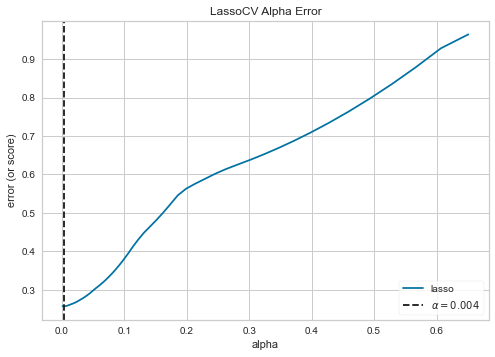

C:\Users\Home\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021061112640>,
               model=None)

In [20]:
#Re-run K-Folds LASSO regressions with folds = 3
kfolds_2 = 3
classifier_optimal_2 = LassoCV(cv=kfolds_2, random_state=1, n_jobs = -1).fit(x,y)
print(summary_coefficients(classifier_optimal_2))

#Using some advice I found at https://www.scikit-yb.org/en/latest/api/regressor/alphas.html, I uncovered Python's optimal alpha.
# Note, as a check, I re-ran the above LASSO with "classifier_1" and changed "alpha_1" to the value suggested in the below graph.
#  Sure enough, the cofficients turned out to be very very close.
alphas(LassoCV(random_state=0), x, y)

In [21]:
#ASE for K-Folds = 3 Cross-Validation Model
y_test_actual_CV = test_data[dependent_variable]
x_test_CV = test_data.drop(columns = [dependent_variable])
y_test_predicted_CV = classifier_optimal_2.predict(x_test_CV)
n_obs_test_CV = test_data.shape[0]

ASE_test_CV = sum((y_test_actual_CV - y_test_predicted_CV)**2)/n_obs_test_CV
print ("The ASE over the",kfolds_2,"fold test partition is",ASE_test_CV)

The ASE over the 3 fold test partition is 0.32662438509217945


In [22]:
#Coefficients from K-folds model in part (j),
S_INCOME   =   0.019475
E_INCOME   =   0.062388
S_POP      =   0.030709
E_POP      =   0.049143
DISTANCE   =   0.605753
VACATION_Yes = -0.614716
SW_Yes     =  -0.641363
SLOT_Free  =  -0.132911
GATE_Free  =  -0.309793
Intercept  =   0.697578

#Values Given For New Route
S_INCOME_new = 28760
E_INCOME_new = 27664
S_POP_new = 4557004
E_POP_new = 3195503
DISTANCE_new = 1976
VACATION_new = 0  ###Vacation  = No
SW_new = 0        ###SW = No
SLOT_new = 1      ###SLOT = Free
GATE_new = 1      ###GATE = Free

#Historical data means
S_INCOME_historical_mean = data['S_INCOME'].mean()
E_INCOME_historical_mean = data['E_INCOME'].mean()
S_POP_historical_mean = data['S_POP'].mean()
E_POP_historical_mean = data['E_POP'].mean()
DISTANCE_historical_mean = data['DISTANCE'].mean()

FARE_historical_mean = data['FARE'].mean()

#Historical data standard deviations
S_INCOME_historical_stddev = data['S_INCOME'].std()
E_INCOME_historical_stddev = data['E_INCOME'].std()
S_POP_historical_stddev = data['S_POP'].std()
E_POP_historical_stddev = data['E_POP'].std()
DISTANCE_historical_stddev = data['DISTANCE'].std()

FARE_historical_stddev = data['FARE'].std()

#New Data Standardized Numerical Values
S_INCOME_new_standardized = (S_INCOME_new - S_INCOME_historical_mean)/S_INCOME_historical_stddev
E_INCOME_new_standardized = (E_INCOME_new - E_INCOME_historical_mean)/E_INCOME_historical_stddev
S_POP_new_standardized = (S_POP_new - S_POP_historical_mean)/S_POP_historical_stddev
E_POP_new_standardized = (E_POP_new - E_POP_historical_mean)/E_POP_historical_stddev
DISTANCE_new_standardized = (DISTANCE_new - DISTANCE_historical_mean)/DISTANCE_historical_stddev

#Predicted New Route Price (Standardized)
predicted_new_route_FARE_standardized_numerical_component = Intercept + (S_INCOME * S_INCOME_new_standardized) + (E_INCOME * E_INCOME_new_standardized) + (S_POP * S_POP_new_standardized) + (E_POP * E_POP_new_standardized) + (DISTANCE * DISTANCE_new_standardized)
predicted_new_route_FARE_categorical_component = (VACATION_Yes * VACATION_new) + (SW_Yes * SW_new) + (SLOT_Free * SLOT_new) + (GATE_Free * GATE_new)

predicted_new_route_FARE_standardized = predicted_new_route_FARE_standardized_numerical_component + predicted_new_route_FARE_categorical_component
print("The standardized value of the price on the new route is",predicted_new_route_FARE_standardized)

#Convert Standardized Price Back to Dollars
predicted_new_route_FARE_unstandardized = (predicted_new_route_FARE_standardized * FARE_historical_stddev) + FARE_historical_mean
print("The unstandardized price on the new route is",predicted_new_route_FARE_unstandardized)

The standardized value of the price on the new route is 1.199433152826707
The unstandardized price on the new route is 252.15926444225383
